# Compare GHS Index and Deaths

GHS Index says how well prepared a country is for a pandemic so we wanted to compare that with the actual deaths.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

PATH_DATA_DEATHS = './data/computed/deaths.csv'
PATH_DATA_CASES = './data/computed/cases.csv'
PATH_DATA_REDUCED = './data/computed/collected_data_reduced_features.csv'

In [2]:
df = pd.read_csv(PATH_DATA_DEATHS)
df_ghs = pd.read_csv(PATH_DATA_REDUCED).loc[:, ["location", "ghs_score"]]
df = df.merge(df_ghs, how = 'left', on = ['location'])
df.drop(["total_deaths", "smokers_percentage"], axis=1, inplace=True)
#df.drop(["total_cases"], axis=1, inplace=True)
#df.dropna(inplace=True)
df.describe()

,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,ghs_score
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000
mean,5.942384e-11,18968.143451,255.914530,6.463602,42.773780
std,1.288110e-10,19893.399363,118.370568,2.530175,13.987614
min,0.000000e+00,661.240000,79.370000,2.224253,16.200000
25%,2.618273e-12,4406.787750,166.697500,4.406192,32.450000
50%,1.152598e-11,12265.791000,240.713500,6.331597,40.200000
75%,4.269378e-11,27341.795500,323.446250,8.156239,52.000000
max,8.480524e-10,116935.600000,724.417000,16.795518,83.500000


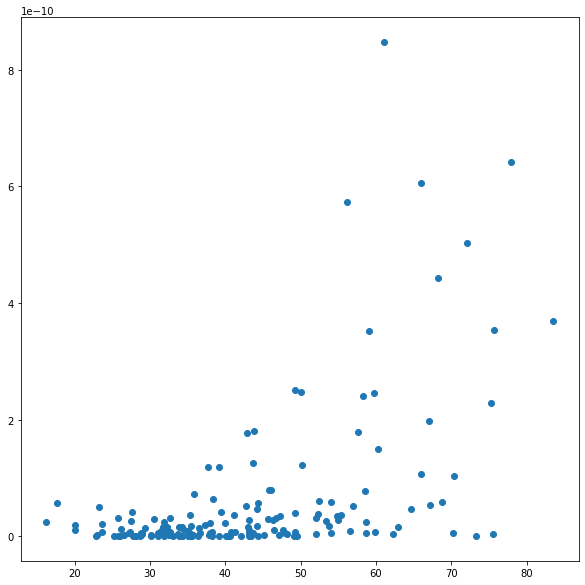

In [3]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(df["ghs_score"].values, df["total_deaths_per_million"].values)

Actually we wanted to cluster the data, but this seems not possible based on the visualization.

Countries with a low GHS Index may not be able to report valid numbers